In [1]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.optimizers import SGD   
##from tensorflow.keras.optimizers import SGD
#from keras.layers import LSTM
#from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

#Libraries for Saving the Model
from pickle import dump
from pickle import load

In [2]:
df = pd.read_excel('MMA823_AssignmentData_topost.xlsx', index_col='Date')

In [3]:
df.head()

,MMAX,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,TWTR,...,HST,HLT,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU
Date,,,,,,,,,,,,,,,,,,,,,
1,33.482319,34.465744,50.064999,976.619995,137.422821,30.548828,76.522003,26.870838,53.836395,18.150000,...,16.140646,63.823997,199.325455,208.325409,2434.50,21397.29,10.48,111.36,1.2659,1.1148
2,34.008343,34.619576,50.187000,986.090027,137.280762,30.557764,76.690002,26.957619,54.107803,18.500000,...,16.183868,64.019783,202.829193,207.332001,2438.30,21394.76,10.02,111.26,1.2727,1.1196
3,33.785179,34.510723,49.699001,972.090027,136.677109,30.843687,75.498001,26.855061,53.954002,18.290001,...,16.382711,63.853378,202.838623,209.080063,2439.07,21409.55,9.90,111.48,1.2732,1.1196
4,31.489799,34.016071,48.839001,948.090027,136.464066,30.566696,72.473999,26.642052,53.338821,18.120001,...,16.261677,62.110935,201.868484,203.597061,2419.38,21310.66,11.06,112.42,1.2791,1.1300
5,32.023800,34.513088,49.516499,961.010010,136.978943,30.897297,74.248001,26.626272,53.537861,17.950001,...,16.252941,62.022831,204.524536,204.036484,2440.69,21454.61,10.03,112.18,1.2936,1.1364


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1141 entries, 1 to 1141
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MMAX     1140 non-null   float64
 1   AAPL     1141 non-null   float64
 2   AMZN     1141 non-null   float64
 3   GOOGL    1141 non-null   float64
 4   MCD      1141 non-null   float64
 5   GM       1141 non-null   float64
 6   TSLA     1141 non-null   float64
 7   PFE      1141 non-null   float64
 8   SBUX     1141 non-null   float64
 9   TWTR     1141 non-null   float64
 10  VZ       1141 non-null   float64
 11  WYNN     1141 non-null   float64
 12  KHC      1141 non-null   float64
 13  JNJ      1141 non-null   float64
 14  HST      1141 non-null   float64
 15  HLT      1141 non-null   float64
 16  FDX      1141 non-null   float64
 17  DPZ      1141 non-null   float64
 18  SP500    1141 non-null   float64
 19  DJIA     1141 non-null   float64
 20  VIXCLS   1141 non-null   float64
 21  DEXJPUS  1141 

In [5]:
df.shape

(1141, 24)

In [6]:
df.isna().sum()

MMAX       1
AAPL       0
AMZN       0
GOOGL      0
MCD        0
GM         0
TSLA       0
PFE        0
SBUX       0
TWTR       0
VZ         0
WYNN       0
KHC        0
JNJ        0
HST        0
HLT        0
FDX        0
DPZ        0
SP500      0
DJIA       0
VIXCLS     0
DEXJPUS    0
DEXUSUK    0
DEXUSEU    0
dtype: int64

# a)	Plot the daily returns of MMAX over the entire period using your choice of graph!

In [7]:
returns=(df-df.shift(1))/df.shift(1)

In [8]:
returns.dropna(inplace=True)

In [9]:
returns.head(5)

,MMAX,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,TWTR,...,HST,HLT,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU
Date,,,,,,,,,,,,,,,,,,,,,
2,0.015710,0.004463,0.002437,0.009697,-0.001034,0.000293,0.002195,0.003230,0.005041,0.019284,...,0.002678,0.003068,0.017578,-0.004769,0.001561,-0.000118,-0.043893,-0.000898,0.005372,0.004306
3,-0.006562,-0.003144,-0.009724,-0.014197,-0.004397,0.009357,-0.015543,-0.003804,-0.002842,-0.011351,...,0.012286,-0.002599,0.000046,0.008431,0.000316,0.000691,-0.011976,0.001977,0.000393,0.000000
4,-0.067940,-0.014333,-0.017304,-0.024689,-0.001559,-0.008980,-0.040054,-0.007932,-0.011402,-0.009295,...,-0.007388,-0.027288,-0.004783,-0.026224,-0.008073,-0.004619,0.117172,0.008432,0.004634,0.009289
5,0.016958,0.014611,0.013872,0.013627,0.003773,0.010816,0.024478,-0.000592,0.003732,-0.009382,...,-0.000537,-0.001418,0.013157,0.002158,0.008808,0.006755,-0.093128,-0.002135,0.011336,0.005664
6,-0.031608,-0.014744,-0.014541,-0.024131,-0.007583,0.008097,-0.028257,-0.003556,-0.013856,-0.016713,...,-0.006452,-0.017519,-0.008842,-0.013343,-0.008600,-0.007811,0.140578,0.001248,0.003711,0.004928


In [11]:
#same thing but use pct_Change
df.pct_change().dropna().head(5)

,MMAX,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,TWTR,...,HST,HLT,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU
Date,,,,,,,,,,,,,,,,,,,,,
2,0.015710,0.004463,0.002437,0.009697,-0.001034,0.000293,0.002195,0.003230,0.005041,0.019284,...,0.002678,0.003068,0.017578,-0.004769,0.001561,-0.000118,-0.043893,-0.000898,0.005372,0.004306
3,-0.006562,-0.003144,-0.009724,-0.014197,-0.004397,0.009357,-0.015543,-0.003804,-0.002842,-0.011351,...,0.012286,-0.002599,0.000046,0.008431,0.000316,0.000691,-0.011976,0.001977,0.000393,0.000000
4,-0.067940,-0.014333,-0.017304,-0.024689,-0.001559,-0.008980,-0.040054,-0.007932,-0.011402,-0.009295,...,-0.007388,-0.027288,-0.004783,-0.026224,-0.008073,-0.004619,0.117172,0.008432,0.004634,0.009289
5,0.016958,0.014611,0.013872,0.013627,0.003773,0.010816,0.024478,-0.000592,0.003732,-0.009382,...,-0.000537,-0.001418,0.013157,0.002158,0.008808,0.006755,-0.093128,-0.002135,0.011336,0.005664
6,-0.031608,-0.014744,-0.014541,-0.024131,-0.007583,0.008097,-0.028257,-0.003556,-0.013856,-0.016713,...,-0.006452,-0.017519,-0.008842,-0.013343,-0.008600,-0.007811,0.140578,0.001248,0.003711,0.004928


In [12]:
returns.describe().round(4)

,MMAX,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,TWTR,...,HST,HLT,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU
count,1139.0000,1139.0000,1139.0000,1139.0000,1139.0000,1139.0000,1139.0000,1139.0000,1139.0000,1139.0000,...,1139.0000,1139.0000,1139.0000,1139.0000,1139.0000,1139.0000,1139.0000,1139.0000,1139.0000,1139.0000
mean,0.0014,0.0016,0.0013,0.0011,0.0007,0.0009,0.0031,0.0008,0.0008,0.0013,...,0.0004,0.0010,0.0005,0.0011,0.0007,0.0006,0.0044,inf,inf,inf
std,0.0239,0.0199,0.0192,0.0177,0.0151,0.0248,0.0394,0.0156,0.0180,0.0323,...,0.0248,0.0204,0.0219,0.0200,0.0127,0.0133,0.0952,NaN,NaN,NaN
min,-0.1650,-0.1286,-0.0792,-0.1163,-0.1588,-0.1732,-0.2106,-0.0773,-0.1620,-0.2111,...,-0.1569,-0.1257,-0.1514,-0.1008,-0.1198,-0.1293,-0.2337,-1.0000,-1.0000,-1.0000
25%,-0.0089,-0.0074,-0.0080,-0.0065,-0.0050,-0.0108,-0.0172,-0.0062,-0.0066,-0.0134,...,-0.0103,-0.0088,-0.0096,-0.0076,-0.0033,-0.0036,-0.0463,-0.0022,-0.0031,-0.0023
50%,0.0020,0.0015,0.0014,0.0013,0.0009,0.0007,0.0016,0.0005,0.0008,0.0013,...,0.0000,0.0010,0.0010,0.0008,0.0011,0.0011,-0.0080,0.0001,-0.0001,0.0000
75%,0.0131,0.0118,0.0110,0.0099,0.0070,0.0112,0.0199,0.0072,0.0084,0.0153,...,0.0104,0.0106,0.0110,0.0098,0.0063,0.0058,0.0356,0.0025,0.0035,0.0026
max,0.1262,0.1198,0.1322,0.0962,0.1813,0.1994,0.1989,0.1086,0.1473,0.1849,...,0.3003,0.1405,0.1204,0.2560,0.0938,0.1137,1.1560,inf,inf,inf


In [13]:
returns.skew()

MMAX      -0.399516
AAPL      -0.110856
AMZN       0.259978
GOOGL     -0.125542
MCD        0.492907
GM         0.188334
TSLA       0.286407
PFE        0.289796
SBUX      -0.032726
TWTR      -0.509686
VZ         0.437332
WYNN       0.234004
KHC       -1.485717
JNJ       -0.425855
HST        1.846371
HLT        0.160667
FDX       -0.511591
DPZ        1.916599
SP500     -0.716257
DJIA      -0.674654
VIXCLS     2.956443
DEXJPUS         NaN
DEXUSUK         NaN
DEXUSEU         NaN
dtype: float64

In [14]:
returns.kurt()

MMAX        6.546715
AAPL        6.182022
AMZN        4.358480
GOOGL       5.506142
MCD        34.563214
GM          9.410420
TSLA        4.779663
PFE         6.766219
SBUX       16.098553
TWTR        8.970865
VZ          6.273567
WYNN        9.663282
KHC        43.154830
JNJ        10.296094
HST        24.668586
HLT         7.495524
FDX         8.363645
DPZ        28.438400
SP500      18.737426
DJIA       21.624665
VIXCLS     23.472671
DEXJPUS          NaN
DEXUSUK          NaN
DEXUSEU          NaN
dtype: float64

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [11, 5]
plt.rcParams["figure.autolayout"] = True

import seaborn as sns
import pandas as pd
import numpy as np

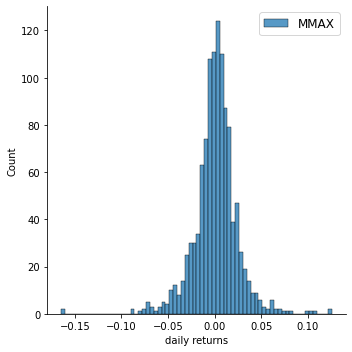

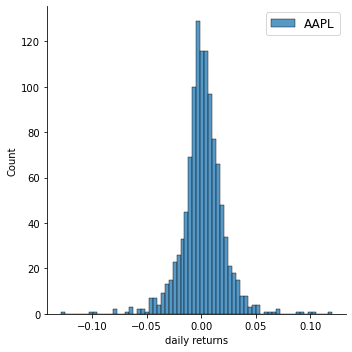

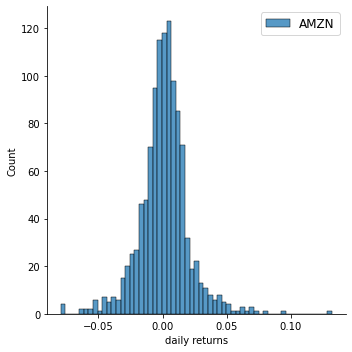

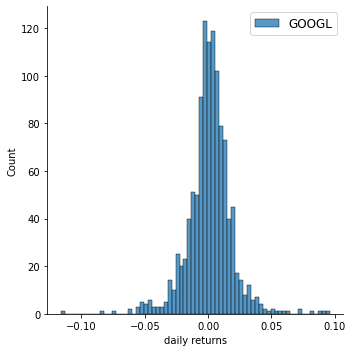

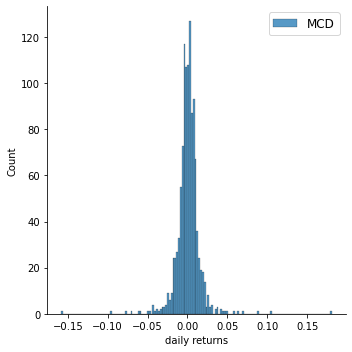

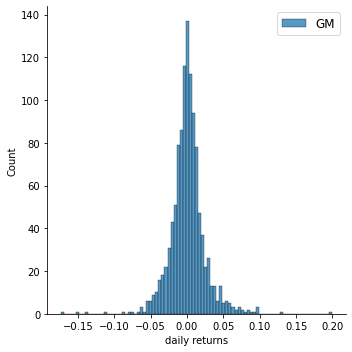

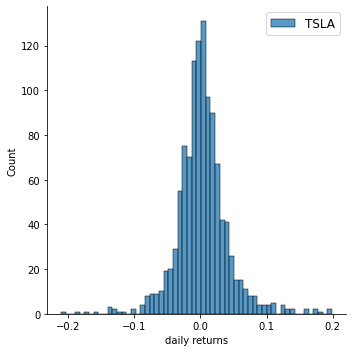

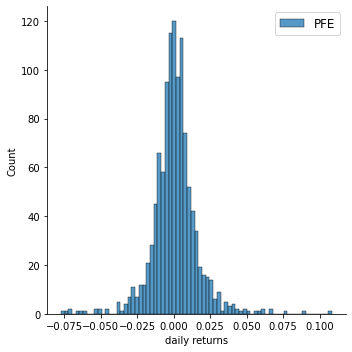

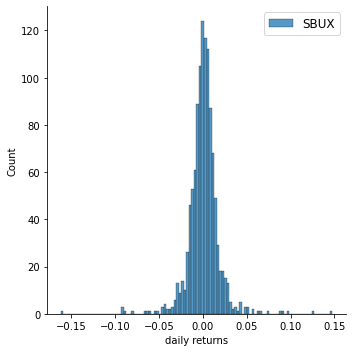

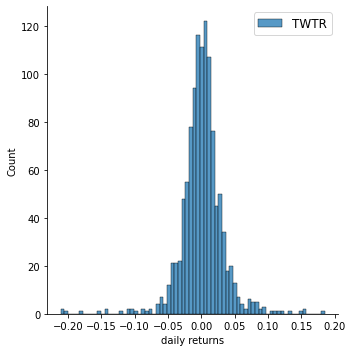

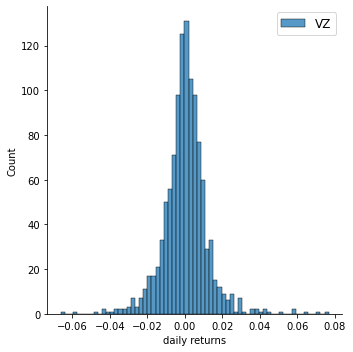

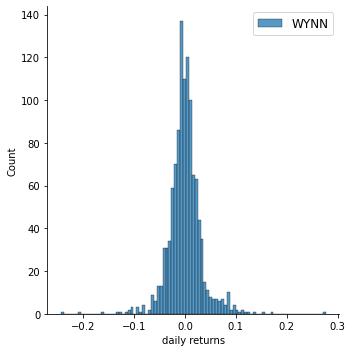

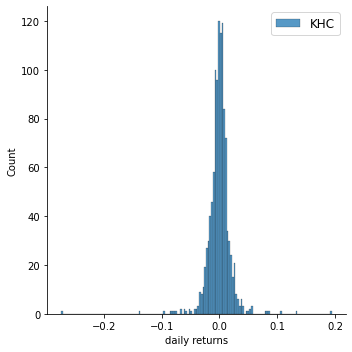

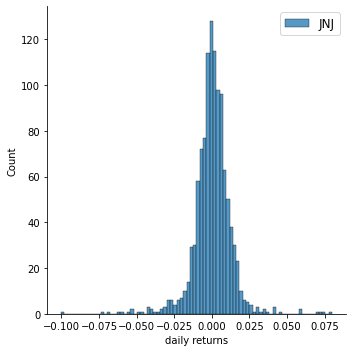

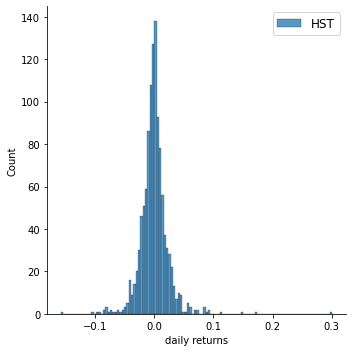

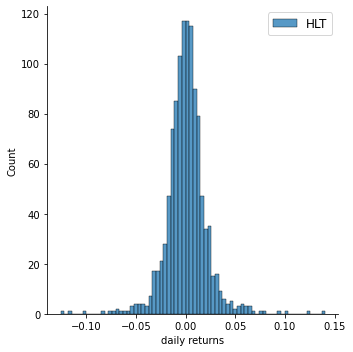

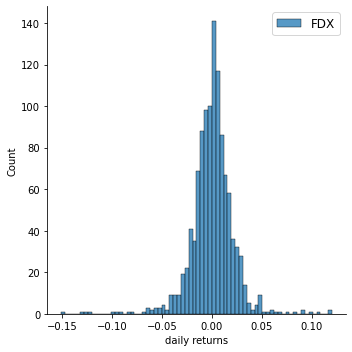

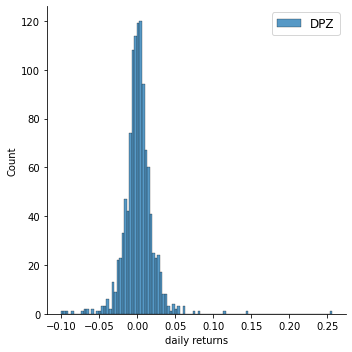

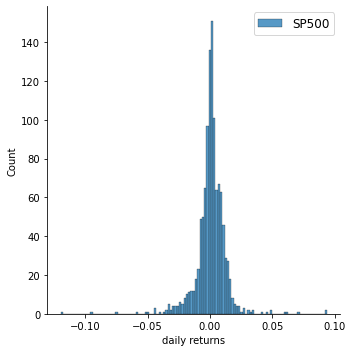

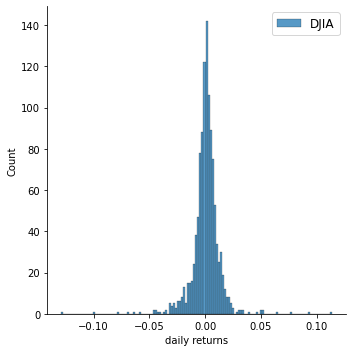

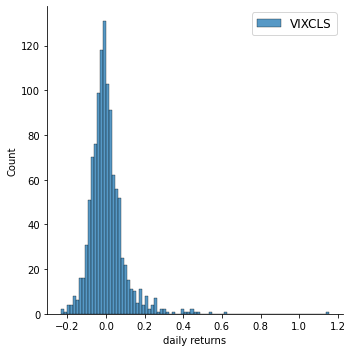

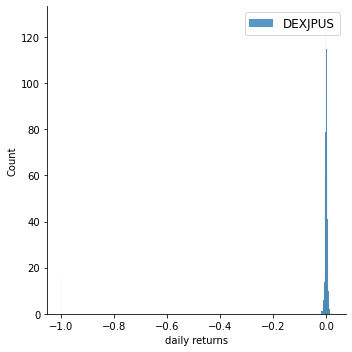

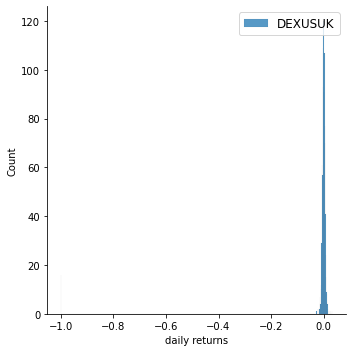

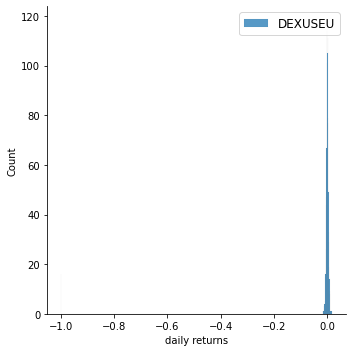

In [17]:
# histogram
for sym in returns.columns.values:
    sns.displot(returns[sym], kind='hist', label=sym)
    plt.legend(loc='upper right', fontsize=12)
    plt.xlabel('daily returns')
    plt.show()

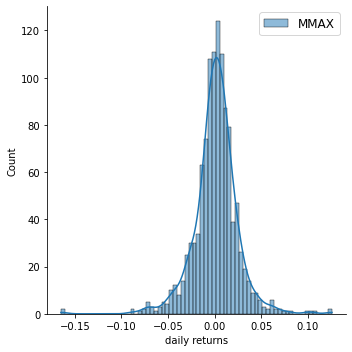

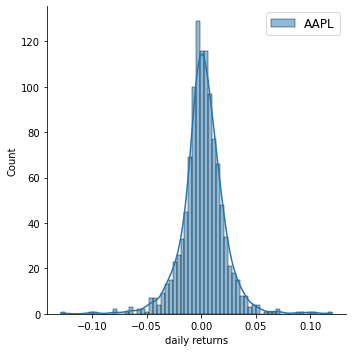

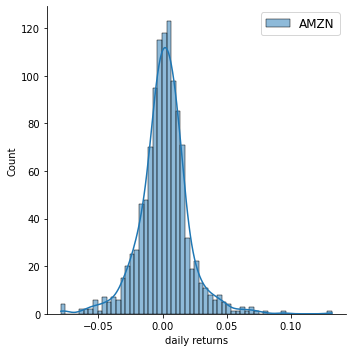

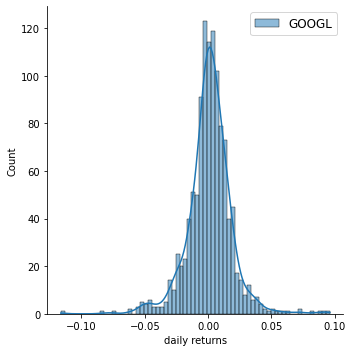

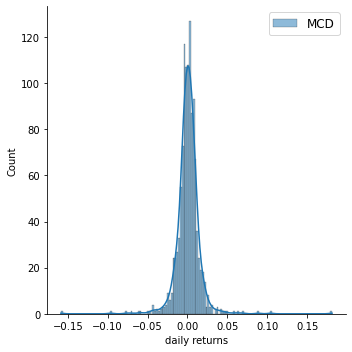

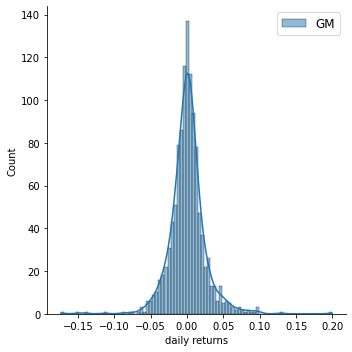

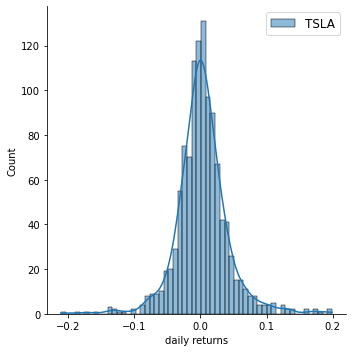

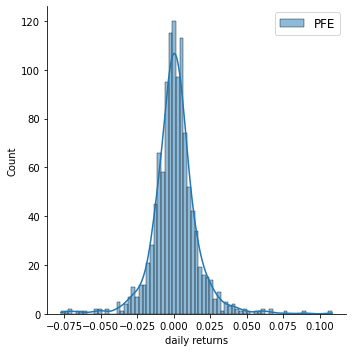

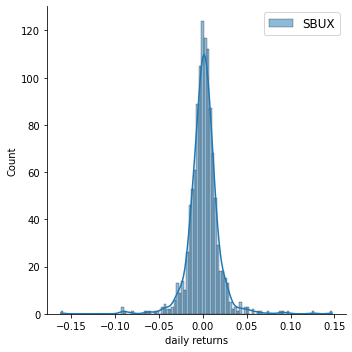

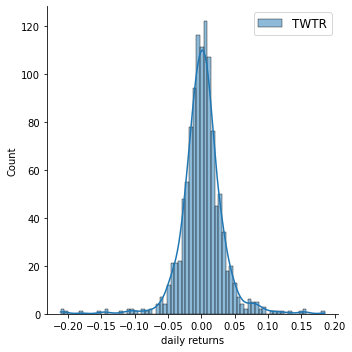

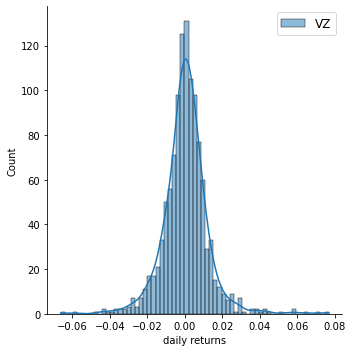

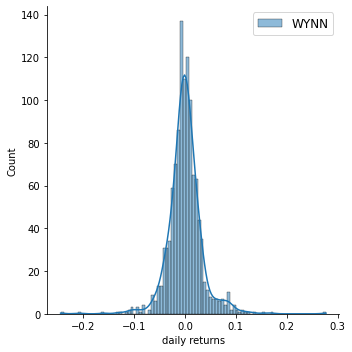

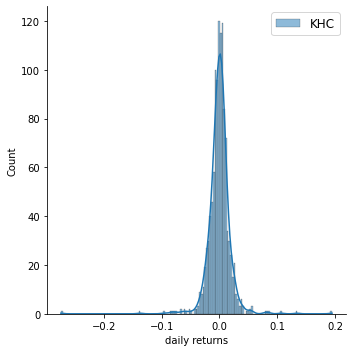

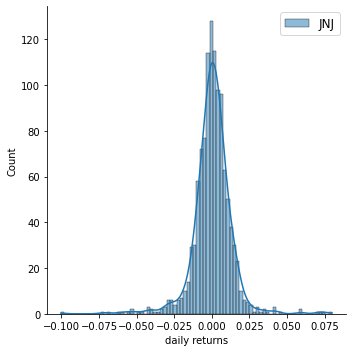

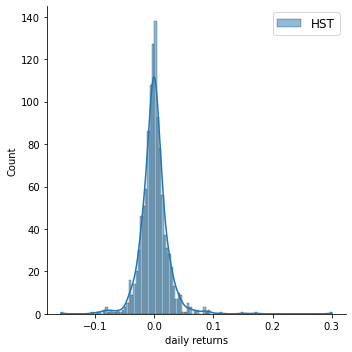

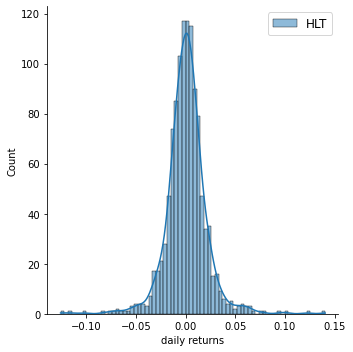

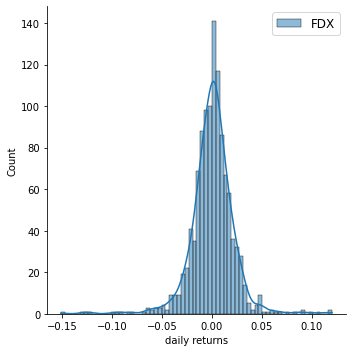

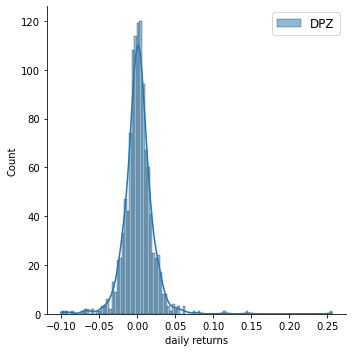

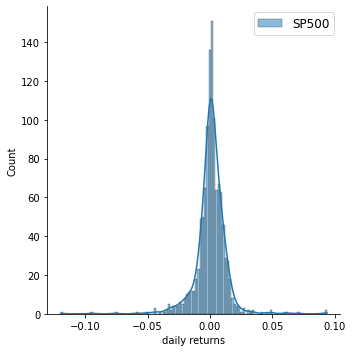

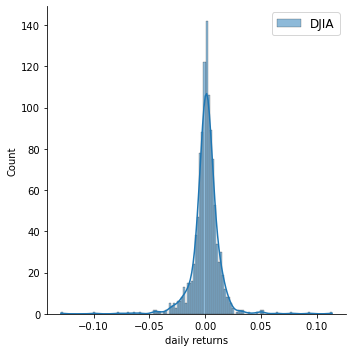

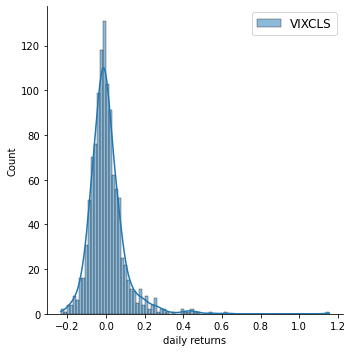

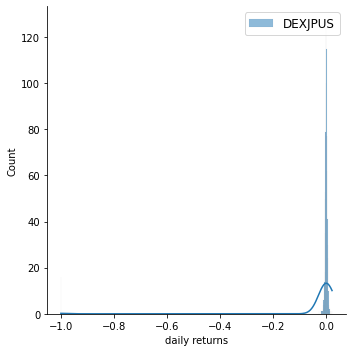

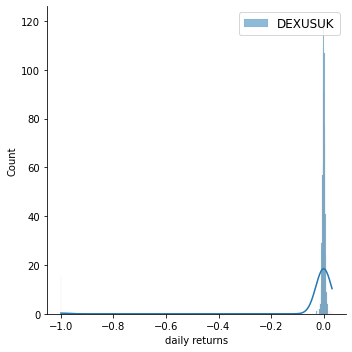

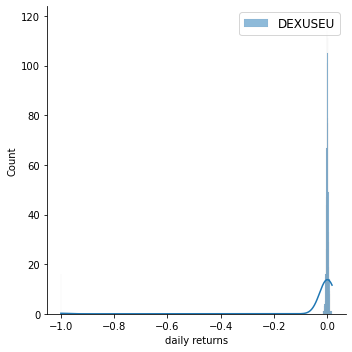

In [18]:
for sym in returns.columns.values:
    sns.displot(returns[sym], kde=True, label=sym)
    plt.legend(loc='upper right', fontsize=12)
    plt.xlabel('daily returns')
    plt.show()

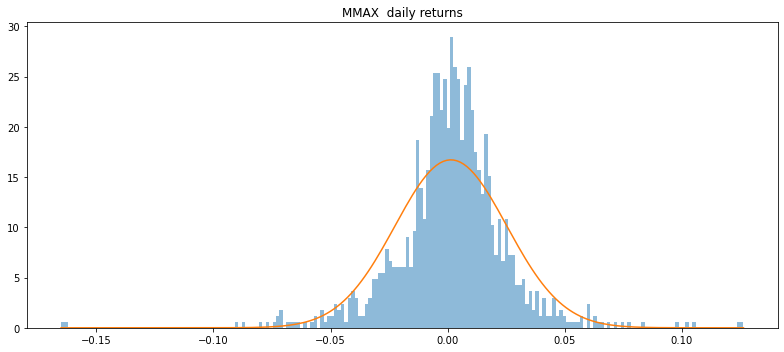

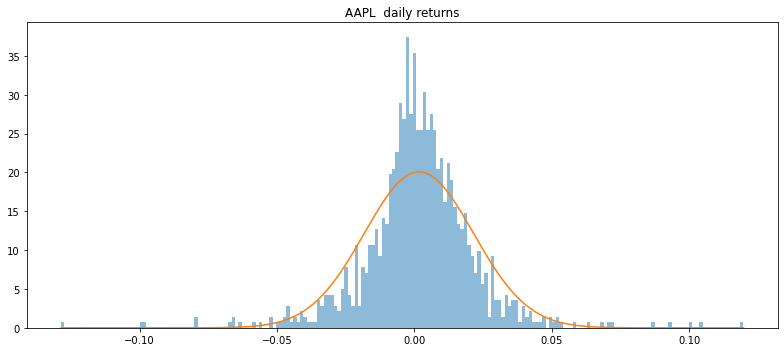

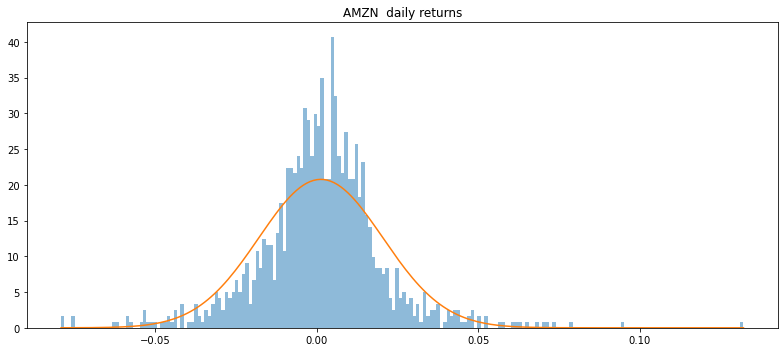

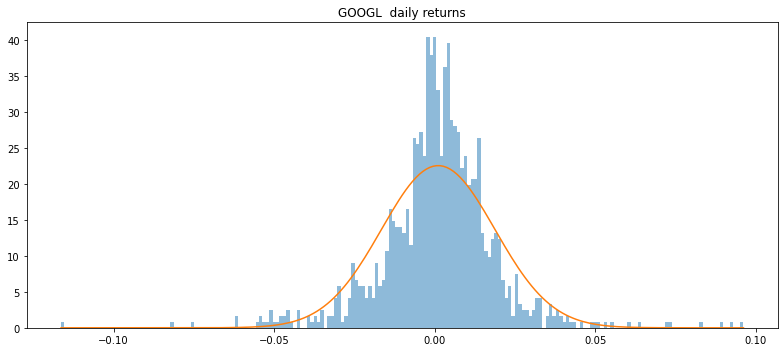

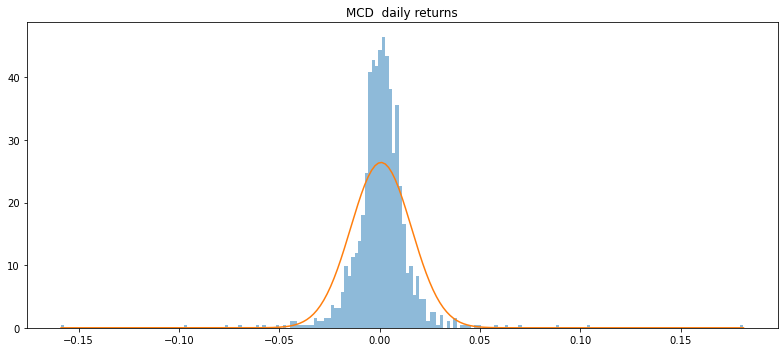

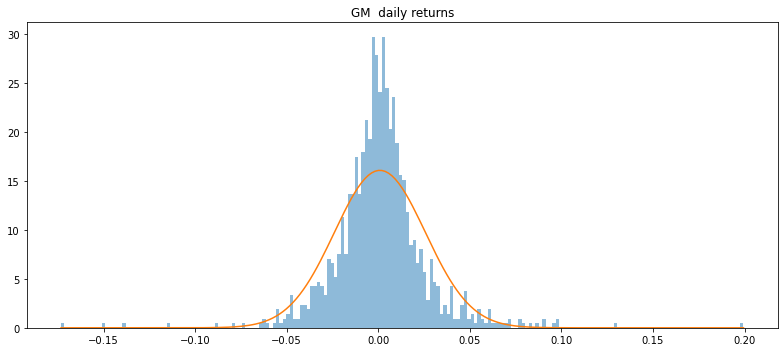

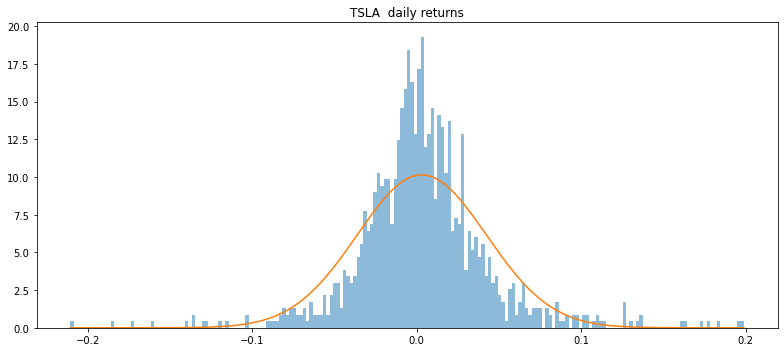

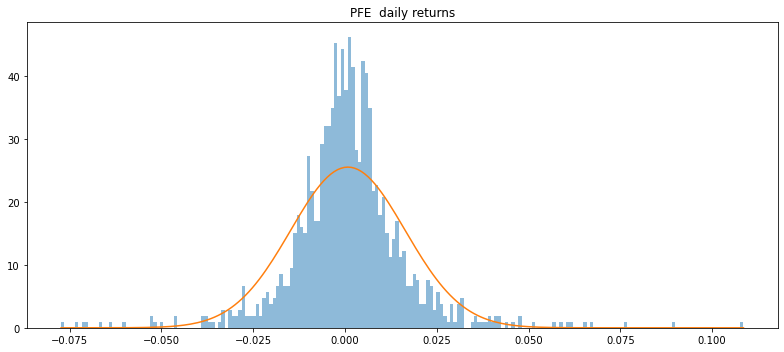

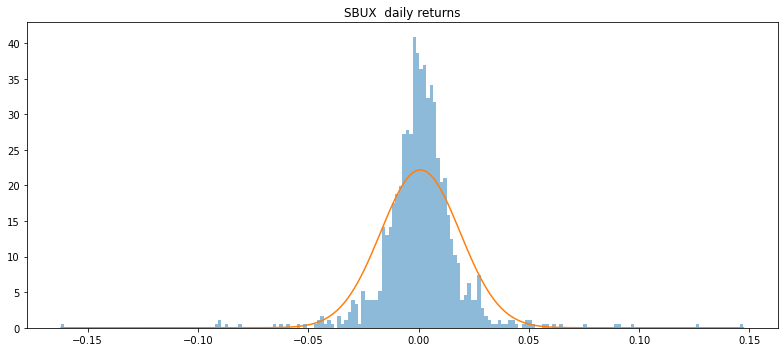

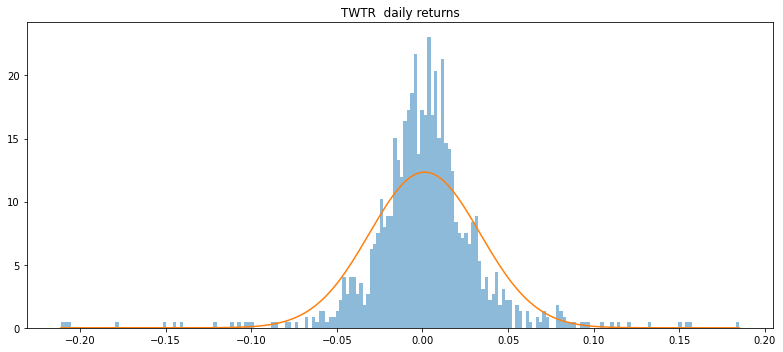

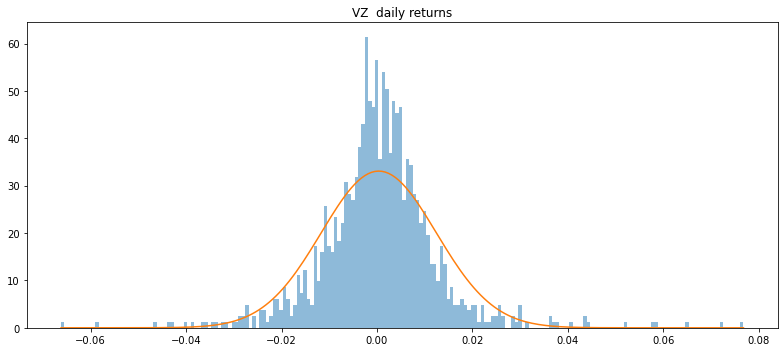

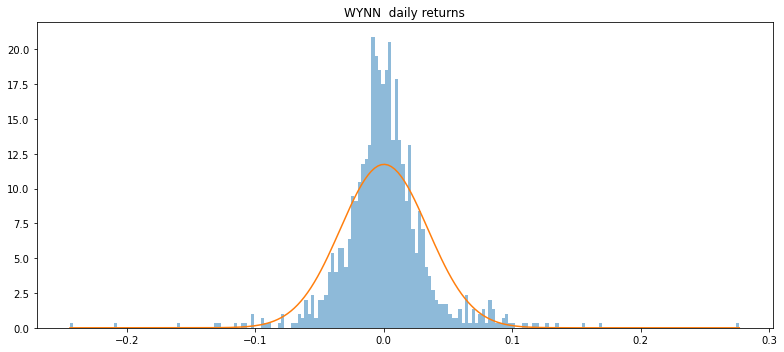

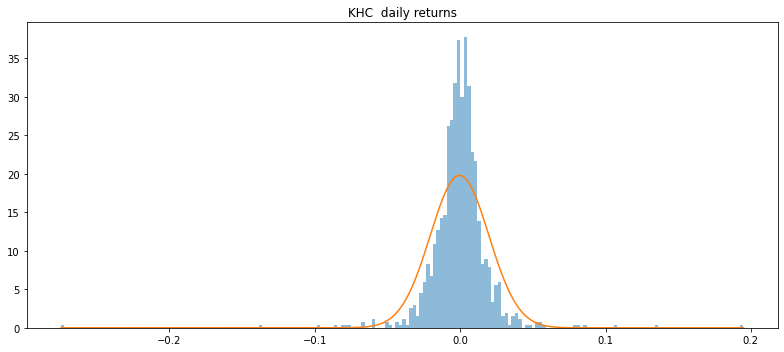

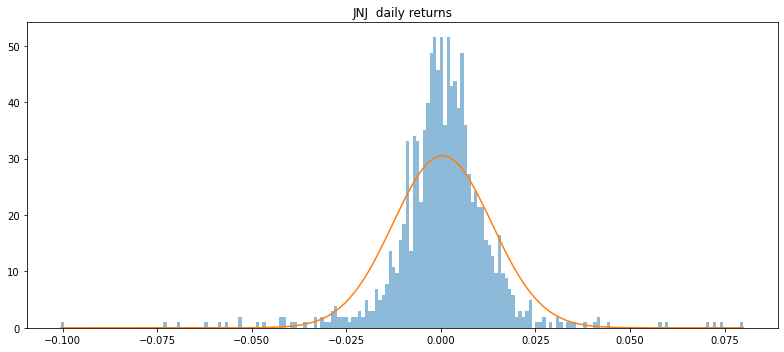

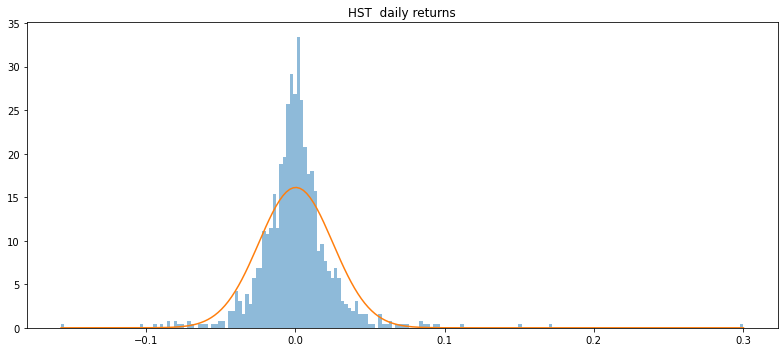

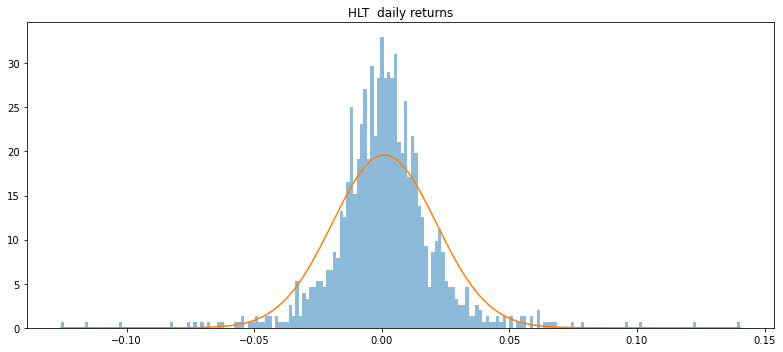

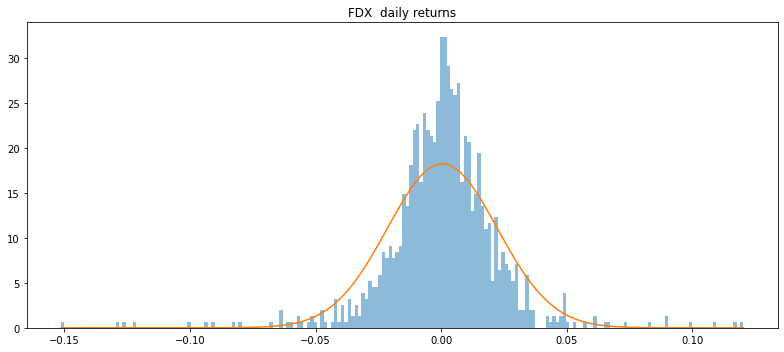

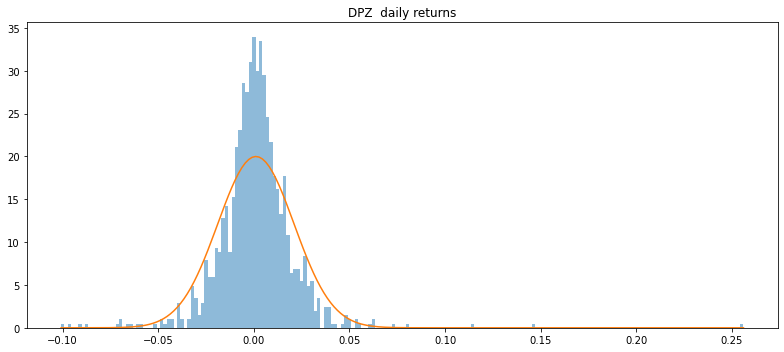

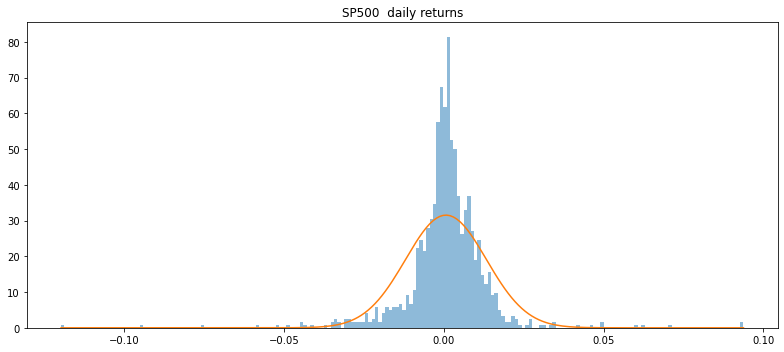

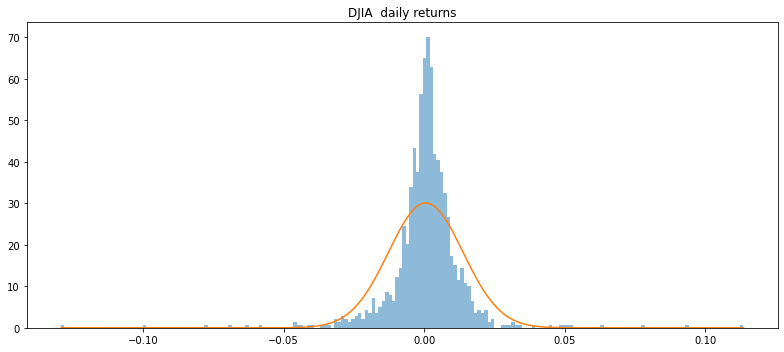

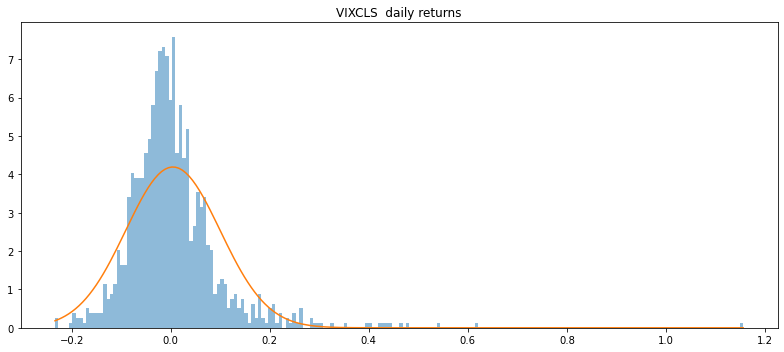

ValueError: supplied range of [-1.0, inf] is not finite

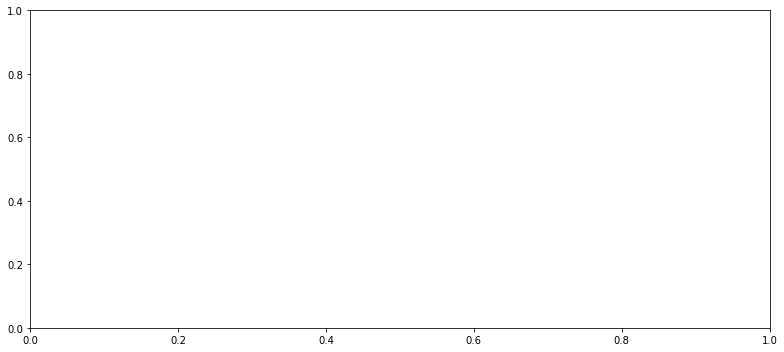

In [19]:
import scipy


for sym in returns.columns.values:
    _, bins, _ = plt.hist(returns[sym], 200, density=1, alpha=0.5)
    mu, sigma = scipy.stats.norm.fit(returns[sym])
    best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
    plt.plot(bins, best_fit_line)
    
    plt.title(f'{sym}  daily returns')
    plt.show()

# b)	Train at least 3 models to predict the missing stock price of MMX!

# • Explain any data pre-processing you used

## 1. Transform the stock price to log return format, as for the model prediction, we are going to predict the log return. The return period I choose 5 days. Daily (1 day) might be too volatile, monthly (21 days) would be too far away, so from my opinion, i would like to use 5 days. 

## 2. Lag 1 day, as the most recent data we can use to predict today's price is yesterday's. 

## 3. More feature engineering have done to create more features for future ML models. I calculated 1M, 3M, 6M and 1 year return as new features.

## 4. There are some zeros, in the currency data, when we take log return, they become infinite. Therefore, I did impute those infinite to zero, which is assuming that these missing data having the same price as what they have 5 days ago.


In [270]:
return_period = 5
Y = np.log(df['MMAX']).diff(return_period).shift(-return_period).dropna()
Y.name = 'MMAX_pred'

In [271]:
Y

Date
1      -0.077
2      -0.096
3      -0.094
4      -0.012
5      -0.075
        ...  
1131    0.070
1132    0.090
1133    0.086
1134    0.052
1135    0.031
Name: MMAX_pred, Length: 1135, dtype: float64

In [272]:
X1 = np.log(df.loc[:,('AAPL', 'AMZN','GOOGL','MCD','GM','TSLA','PFE','SBUX','TWTR','VZ','WYNN','KHC','JNJ','HST','HLT','FDX','DPZ')]).diff(return_period)
X1
# X1.columns = X1.columns.droplevel()
# X1

,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,TWTR,VZ,WYNN,KHC,JNJ,HST,HLT,FDX,DPZ
Date,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,0.052,-0.002,0.043,0.025,0.040,0.160,-0.005,0.050,0.029,-0.009,0.063,-0.002,0.009,0.107,0.097,0.023,0.053
1138,0.055,0.021,0.035,0.023,0.055,0.190,-0.051,0.067,0.010,-0.007,0.068,0.017,0.015,0.121,0.099,0.043,0.050
1139,0.036,-0.007,0.022,0.015,0.044,0.146,-0.024,0.053,-0.037,-0.008,-0.016,0.023,0.026,0.036,0.045,0.022,0.059


In [273]:
X2 = np.log(df.loc[:,('DEXJPUS','DEXUSUK','DEXUSEU')]).diff(return_period)
X3 = np.log(df.loc[:,('SP500','DJIA','VIXCLS')]).diff(return_period)

In [274]:
X4 = pd.concat([np.log(df.loc[:, ('MMAX')]).diff(i) for i in [21, 63, 126,252]], axis=1).dropna()
X4.columns = ['1M', '3M', '6M', '1Y']


In [275]:
X4

,1M,3M,6M,1Y
Date,,,,
253,0.010,0.045,0.359,0.381
254,-0.032,-0.030,0.307,0.324
255,-0.006,-0.004,0.314,0.342
256,-0.017,-0.011,0.300,0.398
257,-0.018,-0.027,0.313,0.393
...,...,...,...,...
1136,0.099,0.265,0.268,0.601
1137,0.124,0.275,0.291,0.622
1138,0.150,0.308,0.276,0.630


In [276]:
X = pd.concat([X1, X2, X3, X4], axis=1)
X

,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,TWTR,VZ,...,DEXJPUS,DEXUSUK,DEXUSEU,SP500,DJIA,VIXCLS,1M,3M,6M,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,0.052,-0.002,0.043,0.025,0.040,0.160,-0.005,0.050,0.029,-0.009,...,0.011,0.013,4.601e-03,0.036,0.026,-0.199,0.124,0.275,0.291,0.622
1138,0.055,0.021,0.035,0.023,0.055,0.190,-0.051,0.067,0.010,-0.007,...,0.011,0.016,1.415e-03,0.047,0.041,-0.265,0.150,0.308,0.276,0.630
1139,0.036,-0.007,0.022,0.015,0.044,0.146,-0.024,0.053,-0.037,-0.008,...,0.008,0.017,5.750e-03,0.030,0.028,-0.215,0.107,0.332,0.283,0.669


In [277]:
# test=X.iloc[1135]
# test

In [278]:
dataset = pd.concat([Y, X], axis=1)
# dataset=dataset.fillna(0)
# dataset

In [279]:
dataset = dataset.iloc[:1136]
dataset=dataset.fillna(0)
dataset

,MMAX_pred,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,TWTR,...,DEXJPUS,DEXUSUK,DEXUSEU,SP500,DJIA,VIXCLS,1M,3M,6M,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1,-0.077,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000e+00,...,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,-0.096,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000e+00,...,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,-0.094,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000e+00,...,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,-0.012,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000e+00,...,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,-0.075,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000e+00,...,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0.090,-0.047,-0.013,-4.333e-02,-0.012,-0.136,-0.087,0.120,-0.072,-5.620e-02,...,1.763e-03,5.277e-04,-3.099e-03,-0.020,-0.017,0.143,0.035,0.239,0.211,0.491
1133,0.086,-0.035,-0.015,-2.936e-02,-0.005,-0.090,-0.071,0.100,-0.067,-3.700e-02,...,2.645e-04,-8.316e-04,0.000e+00,-0.022,-0.020,0.119,0.038,0.254,0.227,0.520
1134,0.052,-0.008,0.008,-3.024e-03,0.007,-0.064,-0.021,0.060,-0.039,2.255e-04,...,4.215e-03,2.115e-03,4.437e-04,0.003,-0.001,-0.041,0.087,0.282,0.268,0.560


In [280]:
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

In [281]:
#Convert to supervised regeression format
def series_to_supervised(data, lag=1):
    n_vars = data.shape[1]
    df = pd.DataFrame(data)    
    cols, names = list(), list()
    for i in range(lag, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (df.columns[j], i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    agg = pd.DataFrame(data.iloc[:,0]).join(agg)
    agg.dropna(inplace=True)
    return agg

In [282]:
dataset= series_to_supervised(dataset,1)
dataset.tail(5)

,MMAX_pred,MMAX_pred(t-1),AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),...,DEXJPUS(t-1),DEXUSUK(t-1),DEXUSEU(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
Date,,,,,,,,,,,,,,,,,,,,,
1132,0.090,0.070,-0.013,-0.031,-2.187e-02,0.012,-0.021,-0.080,0.162,-0.015,...,1.232e-03,1.033e-02,2.124e-03,2.614e-04,0.004,-0.048,0.009,0.231,0.212,0.491
1133,0.086,0.090,-0.047,-0.013,-4.333e-02,-0.012,-0.136,-0.087,0.120,-0.072,...,1.763e-03,5.277e-04,-3.099e-03,-1.958e-02,-0.017,0.143,0.035,0.239,0.211,0.491
1134,0.052,0.086,-0.035,-0.015,-2.936e-02,-0.005,-0.090,-0.071,0.100,-0.067,...,2.645e-04,-8.316e-04,0.000e+00,-2.186e-02,-0.020,0.119,0.038,0.254,0.227,0.520
1135,0.031,0.052,-0.008,0.008,-3.024e-03,0.007,-0.064,-0.021,0.060,-0.039,...,4.215e-03,2.115e-03,4.437e-04,3.262e-03,-0.001,-0.041,0.087,0.282,0.268,0.560
1136,0.000,0.031,-0.021,-0.013,-1.776e-04,0.002,-0.044,0.033,0.013,-0.026,...,3.420e-03,9.865e-03,5.579e-03,-2.826e-03,-0.005,-0.035,0.089,0.267,0.259,0.580


In [283]:
dataset

,MMAX_pred,MMAX_pred(t-1),AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),...,DEXJPUS(t-1),DEXUSUK(t-1),DEXUSEU(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
Date,,,,,,,,,,,,,,,,,,,,,
2,-0.096,-0.077,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
3,-0.094,-0.096,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
4,-0.012,-0.094,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
5,-0.075,-0.012,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
6,-0.018,-0.075,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0.090,0.070,-0.013,-0.031,-2.187e-02,0.012,-0.021,-0.080,0.162,-0.015,...,1.232e-03,1.033e-02,2.124e-03,2.614e-04,0.004,-0.048,0.009,0.231,0.212,0.491
1133,0.086,0.090,-0.047,-0.013,-4.333e-02,-0.012,-0.136,-0.087,0.120,-0.072,...,1.763e-03,5.277e-04,-3.099e-03,-1.958e-02,-0.017,0.143,0.035,0.239,0.211,0.491
1134,0.052,0.086,-0.035,-0.015,-2.936e-02,-0.005,-0.090,-0.071,0.100,-0.067,...,2.645e-04,-8.316e-04,0.000e+00,-2.186e-02,-0.020,0.119,0.038,0.254,0.227,0.520


In [284]:
test=dataset.iloc[1134]
test

MMAX_pred         0.000e+00
MMAX_pred(t-1)    3.097e-02
AAPL(t-1)        -2.062e-02
AMZN(t-1)        -1.323e-02
GOOGL(t-1)       -1.776e-04
MCD(t-1)          1.586e-03
GM(t-1)          -4.413e-02
TSLA(t-1)         3.313e-02
PFE(t-1)          1.267e-02
SBUX(t-1)        -2.597e-02
TWTR(t-1)        -3.865e-03
VZ(t-1)           4.298e-02
WYNN(t-1)         3.749e-02
KHC(t-1)          6.572e-03
JNJ(t-1)         -1.893e-02
HST(t-1)          8.485e-02
HLT(t-1)          8.503e-02
FDX(t-1)          3.742e-02
DPZ(t-1)          2.061e-02
DEXJPUS(t-1)      3.420e-03
DEXUSUK(t-1)      9.865e-03
DEXUSEU(t-1)      5.579e-03
SP500(t-1)       -2.826e-03
DJIA(t-1)        -4.842e-03
VIXCLS(t-1)      -3.481e-02
1M(t-1)           8.873e-02
3M(t-1)           2.669e-01
6M(t-1)           2.592e-01
1Y(t-1)           5.801e-01
Name: 1136, dtype: float64

In [285]:
dataset = dataset.iloc[0:1134]
dataset

,MMAX_pred,MMAX_pred(t-1),AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),...,DEXJPUS(t-1),DEXUSUK(t-1),DEXUSEU(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
Date,,,,,,,,,,,,,,,,,,,,,
2,-0.096,-0.077,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
3,-0.094,-0.096,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
4,-0.012,-0.094,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
5,-0.075,-0.012,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
6,-0.018,-0.075,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0.070,0.061,0.024,-0.016,-0.012,0.019,-0.036,-0.091,0.135,-0.014,...,0.000e+00,-1.664e-03,-6.109e-03,1.836e-03,0.005,-0.031,-0.011,0.217,0.171,0.495
1132,0.090,0.070,-0.013,-0.031,-0.022,0.012,-0.021,-0.080,0.162,-0.015,...,1.232e-03,1.033e-02,2.124e-03,2.614e-04,0.004,-0.048,0.009,0.231,0.212,0.491
1133,0.086,0.090,-0.047,-0.013,-0.043,-0.012,-0.136,-0.087,0.120,-0.072,...,1.763e-03,5.277e-04,-3.099e-03,-1.958e-02,-0.017,0.143,0.035,0.239,0.211,0.491


# EDA

In [183]:
# shape
dataset.shape

(1134, 29)

In [184]:
# peek at data
pd.set_option('display.width', 100)
dataset

,MMAX_pred,MMAX_pred(t-1),AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),...,DEXJPUS(t-1),DEXUSUK(t-1),DEXUSEU(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
Date,,,,,,,,,,,,,,,,,,,,,
2,-0.096,-0.077,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
3,-0.094,-0.096,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
4,-0.012,-0.094,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
5,-0.075,-0.012,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
6,-0.018,-0.075,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0.070,0.061,0.024,-0.016,-0.012,0.019,-0.036,-0.091,0.135,-0.014,...,0.000e+00,-1.664e-03,-6.109e-03,1.836e-03,0.005,-0.031,-0.011,0.217,0.171,0.495
1132,0.090,0.070,-0.013,-0.031,-0.022,0.012,-0.021,-0.080,0.162,-0.015,...,1.232e-03,1.033e-02,2.124e-03,2.614e-04,0.004,-0.048,0.009,0.231,0.212,0.491
1133,0.086,0.090,-0.047,-0.013,-0.043,-0.012,-0.136,-0.087,0.120,-0.072,...,1.763e-03,5.277e-04,-3.099e-03,-1.958e-02,-0.017,0.143,0.035,0.239,0.211,0.491


In [185]:
# types
pd.set_option('display.max_rows', 500)
dataset.dtypes

MMAX_pred         float64
MMAX_pred(t-1)    float64
AAPL(t-1)         float64
AMZN(t-1)         float64
GOOGL(t-1)        float64
MCD(t-1)          float64
GM(t-1)           float64
TSLA(t-1)         float64
PFE(t-1)          float64
SBUX(t-1)         float64
TWTR(t-1)         float64
VZ(t-1)           float64
WYNN(t-1)         float64
KHC(t-1)          float64
JNJ(t-1)          float64
HST(t-1)          float64
HLT(t-1)          float64
FDX(t-1)          float64
DPZ(t-1)          float64
DEXJPUS(t-1)      float64
DEXUSUK(t-1)      float64
DEXUSEU(t-1)      float64
SP500(t-1)        float64
DJIA(t-1)         float64
VIXCLS(t-1)       float64
1M(t-1)           float64
3M(t-1)           float64
6M(t-1)           float64
1Y(t-1)           float64
dtype: object

In [186]:
# describe data
pd.set_option('display.precision', 3)
dataset.describe()

,MMAX_pred,MMAX_pred(t-1),AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),...,DEXJPUS(t-1),DEXUSUK(t-1),DEXUSEU(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
count,1134.000,1134.000,1134.000,1134.000,1134.000,1134.000,1134.000,1134.000,1134.000,1134.000,...,1.134e+03,1.134e+03,1134.000,1134.000,1134.000,1134.000,1134.000,1134.000,1134.000,1134.000
mean,0.005,0.005,0.007,0.005,0.005,0.003,0.003,0.011,0.003,0.003,...,NaN,NaN,NaN,0.003,0.002,0.003,0.014,0.036,0.075,0.182
std,0.050,0.050,0.040,0.040,0.035,0.031,0.056,0.090,0.033,0.036,...,NaN,NaN,NaN,0.025,0.027,0.171,0.086,0.147,0.212,0.274
min,-0.194,-0.194,-0.193,-0.151,-0.168,-0.316,-0.437,-0.563,-0.167,-0.239,...,-inf,-inf,-inf,-0.198,-0.209,-0.559,-0.309,-0.356,-0.443,-0.273
25%,-0.022,-0.022,-0.014,-0.017,-0.013,-0.010,-0.025,-0.038,-0.012,-0.013,...,-5.384e-03,-7.405e-03,-0.006,-0.005,-0.007,-0.092,-0.026,-0.040,0.000,0.000
50%,0.008,0.008,0.010,0.006,0.007,0.005,0.001,0.009,0.004,0.005,...,6.060e-04,-5.490e-04,0.000,0.005,0.004,-0.012,0.000,0.000,0.025,0.065
75%,0.033,0.033,0.029,0.028,0.025,0.017,0.030,0.054,0.021,0.021,...,5.994e-03,8.248e-03,0.006,0.015,0.014,0.079,0.063,0.141,0.213,0.446
max,0.217,0.217,0.169,0.164,0.145,0.204,0.280,0.448,0.162,0.182,...,inf,inf,inf,0.160,0.183,0.992,0.280,0.430,0.709,0.833


In [187]:
np.isinf(dataset).sum()

MMAX_pred          0
MMAX_pred(t-1)     0
AAPL(t-1)          0
AMZN(t-1)          0
GOOGL(t-1)         0
MCD(t-1)           0
GM(t-1)            0
TSLA(t-1)          0
PFE(t-1)           0
SBUX(t-1)          0
TWTR(t-1)          0
VZ(t-1)            0
WYNN(t-1)          0
KHC(t-1)           0
JNJ(t-1)           0
HST(t-1)           0
HLT(t-1)           0
FDX(t-1)           0
DPZ(t-1)           0
DEXJPUS(t-1)      32
DEXUSUK(t-1)      32
DEXUSEU(t-1)      32
SP500(t-1)         0
DJIA(t-1)          0
VIXCLS(t-1)        0
1M(t-1)            0
3M(t-1)            0
6M(t-1)            0
1Y(t-1)            0
dtype: int64

In [188]:
# Replace infinite updated data with nan
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [189]:
dataset.describe()

,MMAX_pred,MMAX_pred(t-1),AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),...,DEXJPUS(t-1),DEXUSUK(t-1),DEXUSEU(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
count,1134.000,1134.000,1134.000,1134.000,1134.000,1134.000,1134.000,1134.000,1134.000,1134.000,...,1.102e+03,1.102e+03,1.102e+03,1134.000,1134.000,1134.000,1134.000,1134.000,1134.000,1134.000
mean,0.005,0.005,0.007,0.005,0.005,0.003,0.003,0.011,0.003,0.003,...,1.098e-04,2.047e-05,-2.572e-05,0.003,0.002,0.003,0.014,0.036,0.075,0.182
std,0.050,0.050,0.040,0.040,0.035,0.031,0.056,0.090,0.033,0.036,...,9.500e-03,1.288e-02,9.257e-03,0.025,0.027,0.171,0.086,0.147,0.212,0.274
min,-0.194,-0.194,-0.193,-0.151,-0.168,-0.316,-0.437,-0.563,-0.167,-0.239,...,-5.226e-02,-9.152e-02,-4.043e-02,-0.198,-0.209,-0.559,-0.309,-0.356,-0.443,-0.273
25%,-0.022,-0.022,-0.014,-0.017,-0.013,-0.010,-0.025,-0.038,-0.012,-0.013,...,-5.170e-03,-7.052e-03,-6.055e-03,-0.005,-0.007,-0.092,-0.026,-0.040,0.000,0.000
50%,0.008,0.008,0.010,0.006,0.007,0.005,0.001,0.009,0.004,0.005,...,6.060e-04,-5.490e-04,0.000e+00,0.005,0.004,-0.012,0.000,0.000,0.025,0.065
75%,0.033,0.033,0.029,0.028,0.025,0.017,0.030,0.054,0.021,0.021,...,5.854e-03,7.932e-03,5.777e-03,0.015,0.014,0.079,0.063,0.141,0.213,0.446
max,0.217,0.217,0.169,0.164,0.145,0.204,0.280,0.448,0.162,0.182,...,5.273e-02,7.540e-02,3.468e-02,0.160,0.183,0.992,0.280,0.430,0.709,0.833


In [190]:
dataset.isna().sum()

MMAX_pred          0
MMAX_pred(t-1)     0
AAPL(t-1)          0
AMZN(t-1)          0
GOOGL(t-1)         0
MCD(t-1)           0
GM(t-1)            0
TSLA(t-1)          0
PFE(t-1)           0
SBUX(t-1)          0
TWTR(t-1)          0
VZ(t-1)            0
WYNN(t-1)          0
KHC(t-1)           0
JNJ(t-1)           0
HST(t-1)           0
HLT(t-1)           0
FDX(t-1)           0
DPZ(t-1)           0
DEXJPUS(t-1)      32
DEXUSUK(t-1)      32
DEXUSEU(t-1)      32
SP500(t-1)         0
DJIA(t-1)          0
VIXCLS(t-1)        0
1M(t-1)            0
3M(t-1)            0
6M(t-1)            0
1Y(t-1)            0
dtype: int64

In [191]:
#Fill na with 0
dataset=dataset.fillna(0)

In [192]:
dataset.isna()

,MMAX_pred,MMAX_pred(t-1),AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),...,DEXJPUS(t-1),DEXUSUK(t-1),DEXUSEU(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
Date,,,,,,,,,,,,,,,,,,,,,
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1133,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [193]:
dataset.isna().sum()

MMAX_pred         0
MMAX_pred(t-1)    0
AAPL(t-1)         0
AMZN(t-1)         0
GOOGL(t-1)        0
MCD(t-1)          0
GM(t-1)           0
TSLA(t-1)         0
PFE(t-1)          0
SBUX(t-1)         0
TWTR(t-1)         0
VZ(t-1)           0
WYNN(t-1)         0
KHC(t-1)          0
JNJ(t-1)          0
HST(t-1)          0
HLT(t-1)          0
FDX(t-1)          0
DPZ(t-1)          0
DEXJPUS(t-1)      0
DEXUSUK(t-1)      0
DEXUSEU(t-1)      0
SP500(t-1)        0
DJIA(t-1)         0
VIXCLS(t-1)       0
1M(t-1)           0
3M(t-1)           0
6M(t-1)           0
1Y(t-1)           0
dtype: int64

In [194]:
dataset.drop(columns=['MMAX_pred(t-1)'], inplace=True)

In [195]:
dataset.head(4)

,MMAX_pred,AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),TWTR(t-1),...,DEXJPUS(t-1),DEXUSUK(t-1),DEXUSEU(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
Date,,,,,,,,,,,,,,,,,,,,,
2,-0.096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


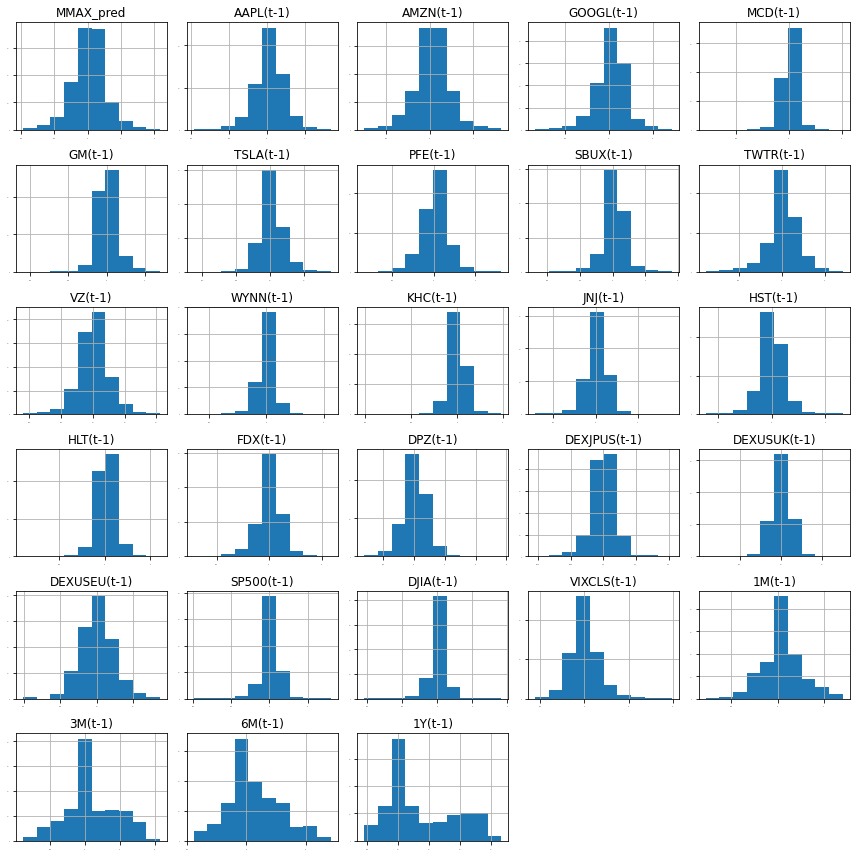

In [196]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

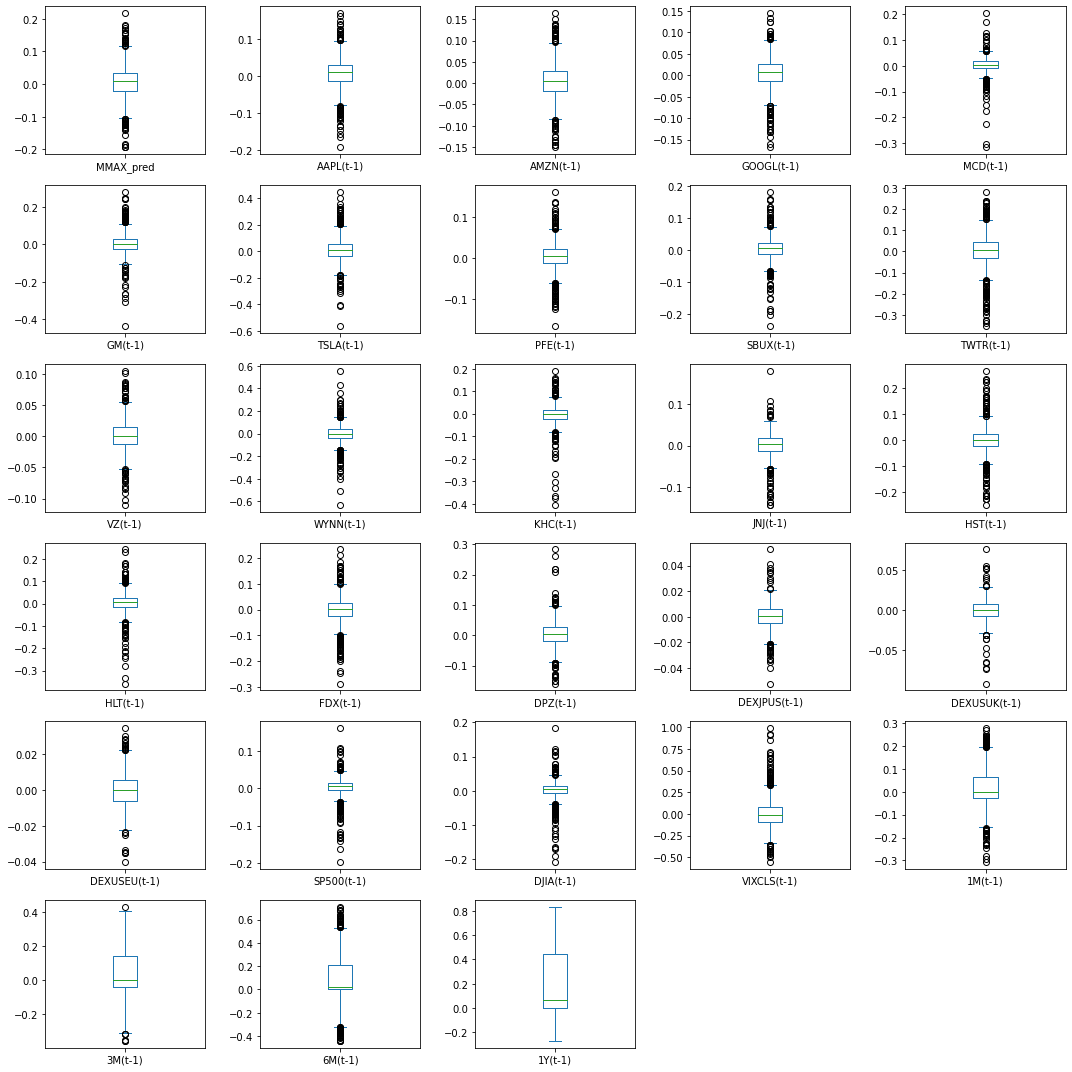

In [197]:
#Box and Whisker Plots
dataset.plot(kind='box', subplots=True, layout=(6,5), sharex=False, sharey=False, figsize=(15,15))
plt.show()

# time series Analysis

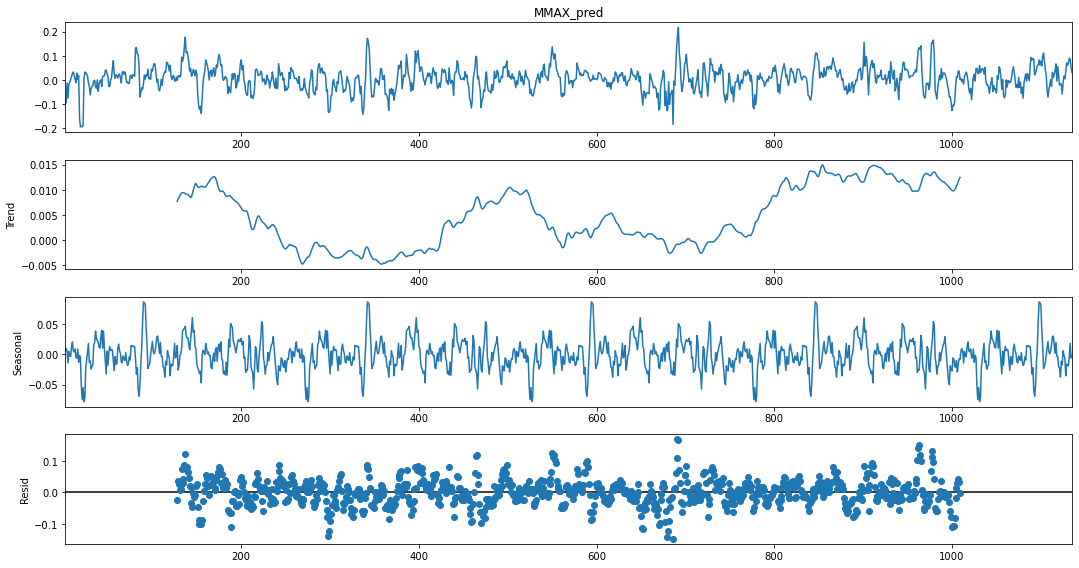

In [202]:
Y= dataset["MMAX_pred"]
res = sm.tsa.seasonal_decompose(Y,freq=252)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [203]:
Y

Date
2      -0.096
3      -0.094
4      -0.012
5      -0.075
6      -0.018
        ...  
1131    0.070
1132    0.090
1133    0.086
1134    0.052
1135    0.031
Name: MMAX_pred, Length: 1134, dtype: float64

# Data cleaning

In [204]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


# Feature Selection

# •	Explain your feature selection process

## I have view the top 10 best features out of 27 features we have in the dataset. Have not filter out any columns due to the time restriction i have. But looking at the pvalues let me notice maybe we can use 0.05 as a cut off to filter out some features with less importance.

In [205]:
Y= dataset["MMAX_pred"]
X = dataset.loc[:, dataset.columns != 'MMAX_pred']

In [251]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134 entries, 2 to 1135
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MMAX_pred     1134 non-null   float64
 1   AAPL(t-1)     1134 non-null   float64
 2   AMZN(t-1)     1134 non-null   float64
 3   GOOGL(t-1)    1134 non-null   float64
 4   MCD(t-1)      1134 non-null   float64
 5   GM(t-1)       1134 non-null   float64
 6   TSLA(t-1)     1134 non-null   float64
 7   PFE(t-1)      1134 non-null   float64
 8   SBUX(t-1)     1134 non-null   float64
 9   TWTR(t-1)     1134 non-null   float64
 10  VZ(t-1)       1134 non-null   float64
 11  WYNN(t-1)     1134 non-null   float64
 12  KHC(t-1)      1134 non-null   float64
 13  JNJ(t-1)      1134 non-null   float64
 14  HST(t-1)      1134 non-null   float64
 15  HLT(t-1)      1134 non-null   float64
 16  FDX(t-1)      1134 non-null   float64
 17  DPZ(t-1)      1134 non-null   float64
 18  DEXJPUS(t-1)  1134 non-null 

In [206]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,  f_regression

bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
DEXUSEU(t-1),16.167
HLT(t-1),11.869
1Y(t-1),10.500
FDX(t-1),8.170
TWTR(t-1),5.358
KHC(t-1),4.250
DEXJPUS(t-1),3.835
DEXUSUK(t-1),3.667
MCD(t-1),2.778


In [207]:
fit.pvalues_

array([4.93877715e-01, 1.09753625e-01, 8.12167180e-01, 9.58737187e-02,
       2.39611644e-01, 9.05359158e-01, 7.74739414e-01, 4.79575043e-01,
       2.08002239e-02, 5.52371085e-01, 3.28639181e-01, 3.94720991e-02,
       4.18442545e-01, 6.26154755e-01, 5.91523012e-04, 4.33747560e-03,
       3.76181714e-01, 5.04299573e-02, 5.57600253e-02, 6.18205286e-05,
       2.55647481e-01, 2.67041122e-01, 8.83003588e-01, 2.37684658e-01,
       1.67454610e-01, 7.54216726e-01, 1.22861758e-03])

# Model Selection

# I basically tried the whole list of both ML model and time series model, though there are some I already known they wont work, i still would like to give it a try, as model tuning and selection's essence is to try as many trials and combinations as you can. Another reason is, if we only have the historical stock price for our MMAX stock, then time series model is definitely a win. However, we still have other features such as index and currency, then ML model is also worth to try.

# Train test split

In [208]:
# split out validation dataset for the end

test_size = 0.2

#In case the data is not dependent on the time series, then train and test split randomly
seed = 7
# X_train, X_test, Y_train, Y_vtest = train_test_split(X, Y, test_size=test_size, random_state=seed)

#In case the data is not dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.

train_size = int(len(X) * (1-test_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

# Test Options and Evaluation Metrics¶

In [209]:
# test options for regression
num_folds = 10
scoring = 'neg_mean_squared_error'
#scoring ='neg_mean_absolute_error'
#scoring = 'r2'

In [210]:
# spot check the algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
#Neural Network
models.append(('MLP', MLPRegressor()))

In [211]:
names = []
kfold_results = []
test_results = []
train_results = []

print("Model,\t CrossValMean,\t CrossValSTD,\t train_MSE,\t test_MSE")
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: \t  %f \t  (%f) \t   %f \t   %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

Model,	 CrossValMean,	 CrossValSTD,	 train_MSE,	 test_MSE
LR: 	  0.002359 	  (0.000446) 	   0.002183 	   0.003738
LASSO: 	  0.002533 	  (0.000412) 	   0.002527 	   0.002540
EN: 	  0.002533 	  (0.000412) 	   0.002527 	   0.002540
KNN: 	  0.001556 	  (0.000211) 	   0.000890 	   0.004595
CART: 	  0.003257 	  (0.000853) 	   0.000007 	   0.007852
SVR: 	  0.002640 	  (0.000284) 	   0.002394 	   0.002861
MLP: 	  0.002363 	  (0.000358) 	   0.002021 	   0.003629


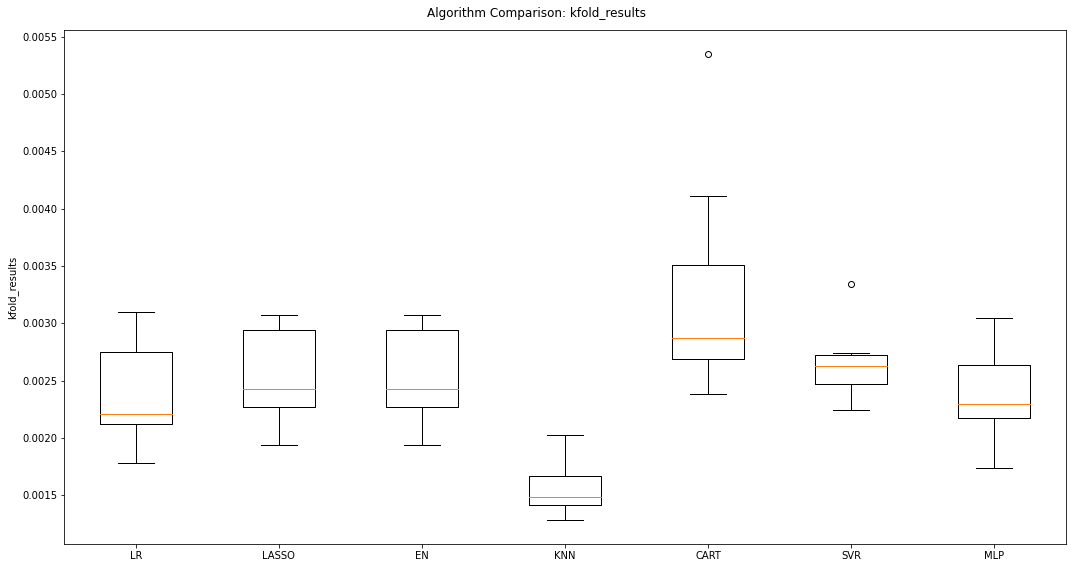

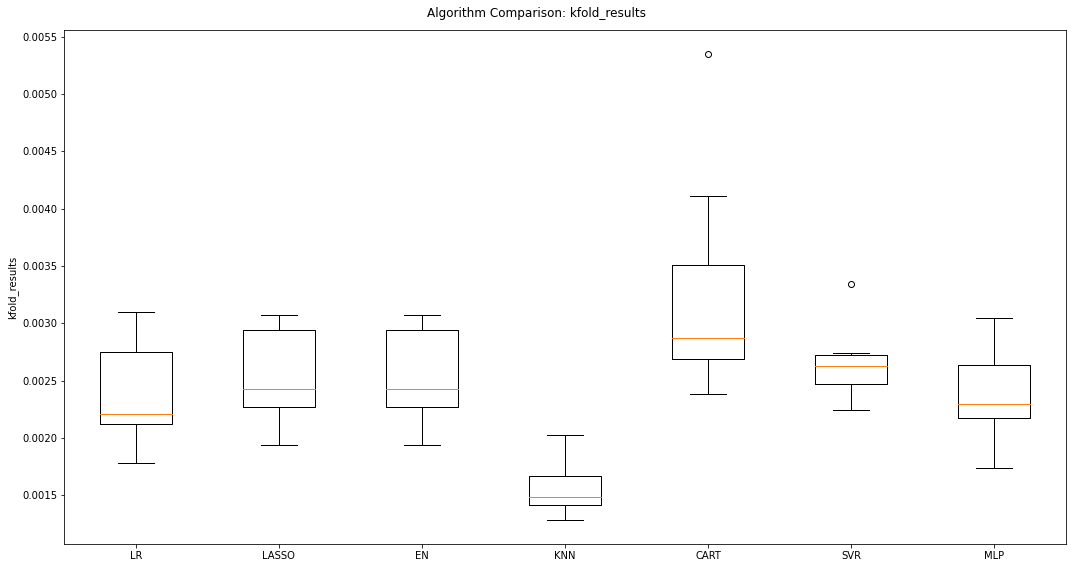

In [212]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison: kfold_results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
plt.ylabel('kfold_results')
fig.set_size_inches(15,8)
plt.show()# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison: kfold_results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
plt.ylabel('kfold_results')
fig.set_size_inches(15,8)
plt.show()

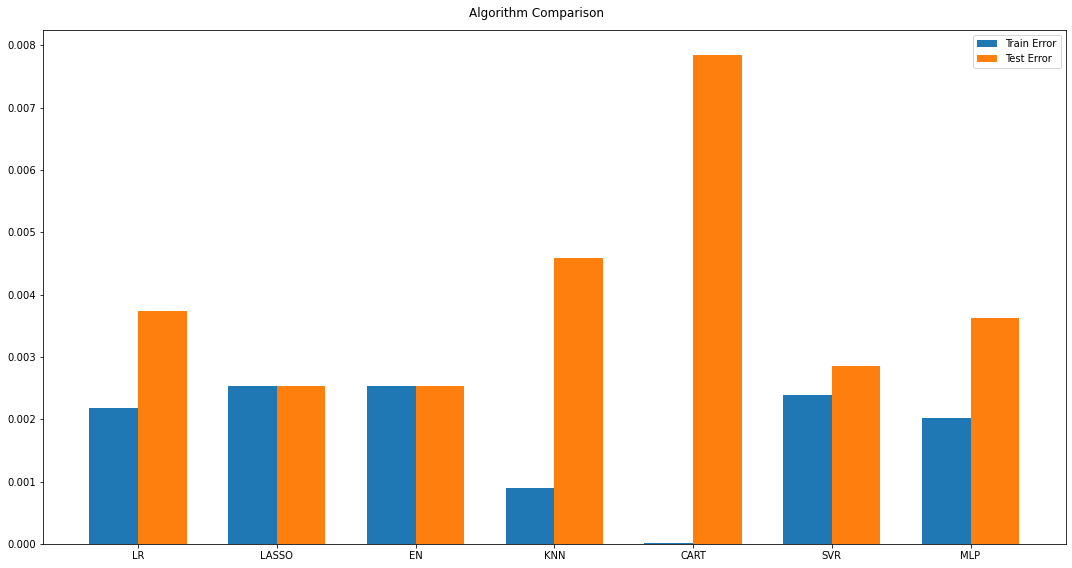

In [213]:
# compare algorithms
fig = plt.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results,  width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

# Time Series Model - ARIMA Model¶

In [214]:
#Preparing data for the ARIMAX Model, seperating endogeneous and exogenous variables
X_train_ARIMA=X_train
X_test_ARIMA=X_test
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

In [215]:
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error

modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])

model_fit = modelARIMA.fit()
#print(model_fit.summary())

error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)

#add 

test_results.append(error_Test_ARIMA)
train_results.append(error_Training_ARIMA)

names.append("ARIMA")
print('ARIMA test error:\t',error_Test_ARIMA)
print('ARIMA train error:\t',error_Training_ARIMA)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.04328D+00    |proj g|=  4.91403D-02

At iterate    5    f= -2.04331D+00    |proj g|=  1.51683D-03

At iterate   10    f= -2.04332D+00    |proj g|=  1.56559D-03


 This problem is unconstrained.



At iterate   15    f= -2.04332D+00    |proj g|=  4.57945D-04

At iterate   20    f= -2.04332D+00    |proj g|=  1.33005D-04

At iterate   25    f= -2.04332D+00    |proj g|=  4.80505D-05

At iterate   30    f= -2.04332D+00    |proj g|=  3.63709D-05

At iterate   35    f= -2.04332D+00    |proj g|=  3.49498D-05

At iterate   40    f= -2.04332D+00    |proj g|=  2.45581D-05

At iterate   45    f= -2.04332D+00    |proj g|=  3.59268D-05

At iterate   50    f= -2.04332D+00    |proj g|=  1.31450D-05

At iterate   55    f= -2.04332D+00    |proj g|=  5.01377D-05

At iterate   60    f= -2.04332D+00    |proj g|=  4.33875D-05

At iterate   65    f= -2.04332D+00    |proj g|=  2.93987D-05

At iterate   70    f= -2.04332D+00    |proj g|=  9.32587D-06

At iterate   75    f= -2.04332D+00    |proj g|=  5.06262D-05

At iterate   80    f= -2.04332D+00    |proj g|=  2.99316D-05

At iterate   85    f= -2.04332D+00    |proj g|=  4.70735D-05

At iterate   90    f= -2.04332D+00    |proj g|=  3.51275D-05

At iter

# LSTM Model

In [216]:
X_train_LSTM, X_test_LSTM = np.array(X_train), np.array(X_test)
Y_train_LSTM, Y_test_LSTM = np.array(Y_train), np.array(Y_test)
X_train_LSTM= X_train_LSTM.reshape((X_train_LSTM.shape[0], 1, X_train_LSTM.shape[1]))
X_test_LSTM= X_test_LSTM.reshape((X_test_LSTM.shape[0], 1, X_test_LSTM.shape[1]))
print(X_train_LSTM.shape, Y_train_LSTM.shape, X_test_LSTM.shape, Y_test_LSTM.shape)

(907, 1, 27) (907,) (227, 1, 27) (227,)


In [217]:
from keras.models import Sequential
from keras.layers import InputLayer

In [218]:
from keras.layers import LSTM

In [219]:
from keras.layers import Activation, Dense

In [220]:
from tensorflow.keras.optimizers import SGD

In [221]:
# design network
def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
        # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    #More number of cells can be added if needed 
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM,\
                              Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),\
                              epochs=50, batch_size=72, verbose=0, shuffle=False)

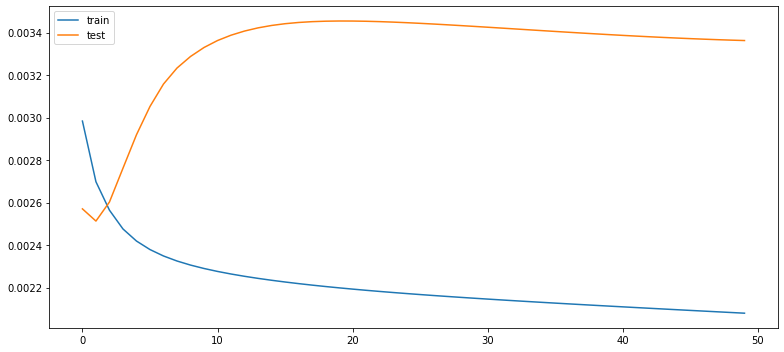

In [222]:
#Visual plot to check if the error is reducing
plt.plot(LSTMModel_fit.history['loss'], label='train')
plt.plot(LSTMModel_fit.history['val_loss'], label='test')
plt.legend()
plt.show()

In [223]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

train_results.append(error_Training_LSTM)
test_results.append(error_Test_LSTM)
names.append("LSTM")

print('For the final model:')
print('MSE:\t ',error_Test_LSTM, '\t RMSE:\t ', np.sqrt(error_Test_LSTM))

8/8 [==============================] - 0s 2ms/step
For the final model:
MSE:	  0.003362766648795887 	 RMSE:	  0.05798936668731507


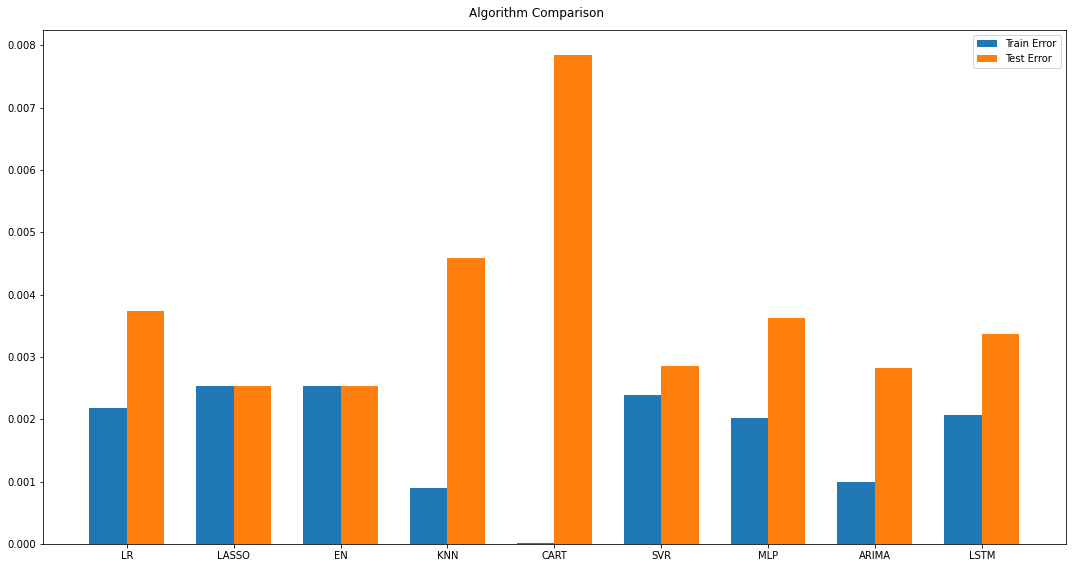

In [224]:
fig = plt.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results,  width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

# Grid Search

In [225]:
# 3. Grid Search : ElasticNet
'''
alpha : float, optional
    Constant that multiplies the penalty terms. Defaults to 1.0.
    See the notes for the exact mathematical meaning of this
    parameter.``alpha = 0`` is equivalent to an ordinary least square,
    solved by the :class:`LinearRegression` object. For numerical
    reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
    Given this, you should use the :class:`LinearRegression` object.

l1_ratio : float
    The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``. For
    ``l1_ratio = 0`` the penalty is an L2 penalty. ``For l1_ratio = 1`` it
    is an L1 penalty.  For ``0 < l1_ratio < 1``, the penalty is a
    combination of L1 and L2.
'''
param_grid = {'alpha': [0.01, 0.1, 0.3, 0.7, 1, 1.5, 3, 5],
              'l1_ratio': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99]}
model = ElasticNet()
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.002428 using {'alpha': 0.01, 'l1_ratio': 0.01}
-0.002428 (0.000409) with: {'alpha': 0.01, 'l1_ratio': 0.01}
-0.002465 (0.000405) with: {'alpha': 0.01, 'l1_ratio': 0.1}
-0.002533 (0.000412) with: {'alpha': 0.01, 'l1_ratio': 0.3}
-0.002533 (0.000412) with: {'alpha': 0.01, 'l1_ratio': 0.5}
-0.002533 (0.000412) with: {'alpha': 0.01, 'l1_ratio': 0.7}
-0.002533 (0.000412) with: {'alpha': 0.01, 'l1_ratio': 0.9}
-0.002533 (0.000412) with: {'alpha': 0.01, 'l1_ratio': 0.99}
-0.002505 (0.000410) with: {'alpha': 0.1, 'l1_ratio': 0.01}
-0.002533 (0.000412) with: {'alpha': 0.1, 'l1_ratio': 0.1}
-0.002533 (0.000412) with: {'alpha': 0.1, 'l1_ratio': 0.3}
-0.002533 (0.000412) with: {'alpha': 0.1, 'l1_ratio': 0.5}
-0.002533 (0.000412) with: {'alpha': 0.1, 'l1_ratio': 0.7}
-0.002533 (0.000412) with: {'alpha': 0.1, 'l1_ratio': 0.9}
-0.002533 (0.000412) with: {'alpha': 0.1, 'l1_ratio': 0.99}
-0.002533 (0.000412) with: {'alpha': 0.3, 'l1_ratio': 0.01}
-0.002533 (0.000412) with: {'alpha': 0.3, 'l1_r

# Final Model - ElasticNet(alpha=0.01, l1_ratio=0.01)

# Based on the result of all the model algo training and testing error. ElasticNet has both training error and testing error and the gap is minimal, which stating a robust model perormance. Therefore i choose it as my final model.

In [231]:
model = ElasticNet(alpha=0.01,l1_ratio=0.01)
model.fit(X_train, Y_train)
# estimate accuracy on validation set
# transform the validation dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(X_test)
print(mean_squared_error(Y_test, predictions))
print(r2_score(Y_test, predictions))

0.0031374166475604667
-0.26946674040754237


In [232]:
predictions

array([-0.00052507, -0.00247562, -0.0016986 , -0.00303627, -0.00528221,
       -0.00612685, -0.00816509, -0.00781737, -0.0076951 , -0.00785078,
       -0.0086118 , -0.00936455, -0.00874146, -0.00839651, -0.0085087 ,
       -0.00847171, -0.00982044, -0.01291194, -0.01093351, -0.0125661 ,
       -0.01363285, -0.00967772, -0.01118093, -0.00669447, -0.00797587,
       -0.0096561 , -0.01409692, -0.01140868, -0.01591792, -0.01669219,
       -0.01284225, -0.01944937, -0.01809501, -0.01647823, -0.01613659,
       -0.01790577, -0.01608881, -0.01151434, -0.01164787, -0.01135392,
       -0.01112566, -0.01008093, -0.01226879, -0.01408159, -0.01624218,
       -0.01761691, -0.01536538, -0.01560022, -0.014157  , -0.01252792,
       -0.01260829, -0.01199733, -0.0136292 , -0.01343311, -0.01323305,
       -0.01266278, -0.01500615, -0.01422334, -0.02001413, -0.02184179,
       -0.02212454, -0.02243638, -0.02102938, -0.01702359, -0.01720006,
       -0.01689469, -0.01596508, -0.01622276, -0.01814782, -0.01

In [233]:
X

,AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),TWTR(t-1),VZ(t-1),...,DEXJPUS(t-1),DEXUSUK(t-1),DEXUSEU(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
Date,,,,,,,,,,,,,,,,,,,,,
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,...,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0.024,-0.016,-0.012,0.019,-0.036,-0.091,0.135,-0.014,-3.676e-02,0.001,...,0.000e+00,-1.664e-03,-6.109e-03,1.836e-03,0.005,-0.031,-0.011,0.217,0.171,0.495
1132,-0.013,-0.031,-0.022,0.012,-0.021,-0.080,0.162,-0.015,-7.437e-02,0.050,...,1.232e-03,1.033e-02,2.124e-03,2.614e-04,0.004,-0.048,0.009,0.231,0.212,0.491
1133,-0.047,-0.013,-0.043,-0.012,-0.136,-0.087,0.120,-0.072,-5.620e-02,0.058,...,1.763e-03,5.277e-04,-3.099e-03,-1.958e-02,-0.017,0.143,0.035,0.239,0.211,0.491


In [234]:
Y

Date
2      -0.096
3      -0.094
4      -0.012
5      -0.075
6      -0.018
        ...  
1131    0.070
1132    0.090
1133    0.086
1134    0.052
1135    0.031
Name: MMAX_pred, Length: 1134, dtype: float64

In [286]:
test=test.drop(['MMAX_pred'])

In [288]:
test=test.drop(['MMAX_pred(t-1)'])

In [289]:
test

AAPL(t-1)      -2.062e-02
AMZN(t-1)      -1.323e-02
GOOGL(t-1)     -1.776e-04
MCD(t-1)        1.586e-03
GM(t-1)        -4.413e-02
TSLA(t-1)       3.313e-02
PFE(t-1)        1.267e-02
SBUX(t-1)      -2.597e-02
TWTR(t-1)      -3.865e-03
VZ(t-1)         4.298e-02
WYNN(t-1)       3.749e-02
KHC(t-1)        6.572e-03
JNJ(t-1)       -1.893e-02
HST(t-1)        8.485e-02
HLT(t-1)        8.503e-02
FDX(t-1)        3.742e-02
DPZ(t-1)        2.061e-02
DEXJPUS(t-1)    3.420e-03
DEXUSUK(t-1)    9.865e-03
DEXUSEU(t-1)    5.579e-03
SP500(t-1)     -2.826e-03
DJIA(t-1)      -4.842e-03
VIXCLS(t-1)    -3.481e-02
1M(t-1)         8.873e-02
3M(t-1)         2.669e-01
6M(t-1)         2.592e-01
1Y(t-1)         5.801e-01
Name: 1136, dtype: float64

In [292]:
price = model.predict([test])
price

array([-0.01651107])

# Stock Price
## Print out the stock price prediction

In [293]:
import math
stock_price=math.exp(price)*110.5930862 
print(stock_price)
# 110.5930862 is stock price 5 days ago


108.78206800129516


## What is your confidence in the prediction? 


In [ ]:
# using training or testing or whole data set sd and mean to calculate CI?
# i am not able to calculate the sd of the prediction
